Data shape: (1797, 64)
Unique labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


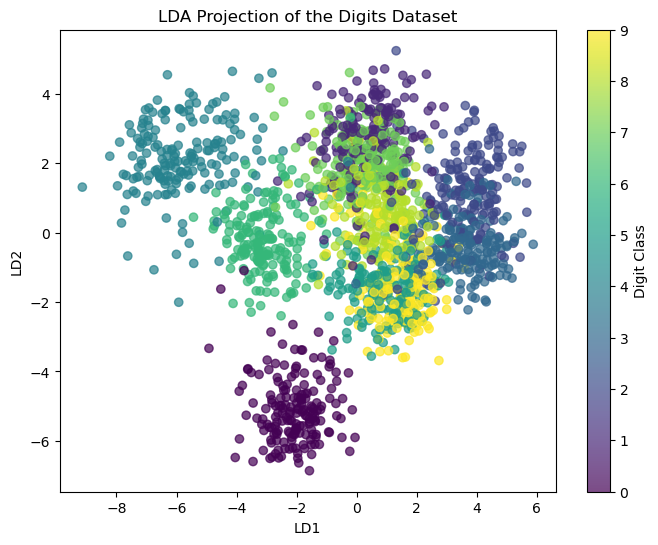

In [5]:
# Author: Hassan Ali
# Problem 1: Dimensionality Reduction Using PCA or LDA
# I'll choose LDA since it uses the class labels to maximize class separation.
# For a dataset like the digits dataset (where the goal is to distinguish between 10 different digits),
# LDA helps in obtaining a 2D representation that emphasizes the differences between classes.

# Importing required libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Loading the digits dataset from sklearn.
# 'digits.data' contains the feature vectors (64-dimensional, as the images are 8x8 pixels).
# 'digits.target' contains the digit labels (0 through 9).
digits = load_digits()
X = digits.data
y = digits.target

# Print the shape of the dataset and the unique digit labels.
print("Data shape:", X.shape)       
print("Unique labels:", sorted(set(y)))  

# Applying LDA for dimensionality reduction.
# As LDA is supervised, it will find axes that maximize the separation between the 10 digit classes.
# Setting n_components=2 to reduce the data to 2 dimensions for visualization.
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plotting the 2D representation obtained from LDA.
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA Projection of the Digits Dataset")
plt.colorbar(scatter, ticks=range(10), label="Digit Class")
plt.show()

# Comparative Analysis:
# LDA 
#  - Strengths: 
#    - Good for dimensionality reduction and visualization. 
#    - LDA especially leverages class labels to maximize separability, often helpful for classification tasks. 
#  - Weaknesses: 
#    - Does not directly classify the data (though LDA can be used as a classifier). 
#    - Only linear separation is considered. 
#    - With images or complex data, higher-level patterns might be lost.

Epoch [1/5], Training Accuracy: 95.44%
Epoch [2/5], Training Accuracy: 98.71%
Epoch [3/5], Training Accuracy: 99.09%
Epoch [4/5], Training Accuracy: 99.41%
Epoch [5/5], Training Accuracy: 99.56%
Test Accuracy: 98.93%


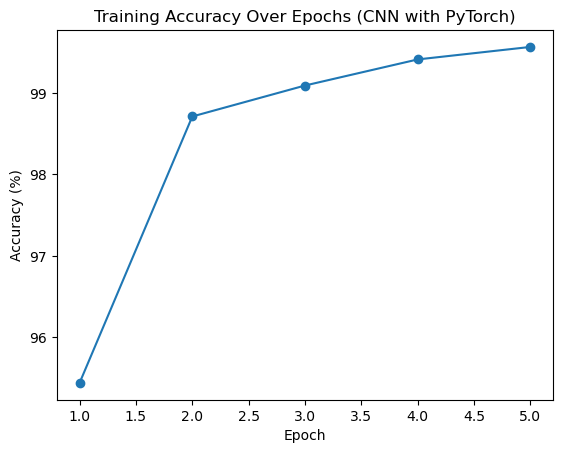

In [4]:
# Author: Hassan Ali
# Convolutional Neural Network (Conv2D) using PyTorch for MNIST
# Objectuive:
# Implement a CNN architecture using PyTorch that classifies the MNIST digits.
# Train the network for at least 5 epochs and report the accuracy.
# Provide clear comments describing the network architecture including convolutional layers, activation
# functions, pooling layers, and fully connected layers.


# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        # First convolutional layer: grayscale input (1 channel), 32 output channels,
        # kernel size 3x3 with padding=1 to preserve spatial dimensions.
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Second convolutional layer: from 32 to 64 channels.
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Max pooling layer with kernel size 2 and stride 2.
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # After pooling, the feature map shape becomes [batch_size, 64, 14, 14].
        # Fully connected layer: input size 64*14*14 = 12544, output 128 units.
        self.fc1 = nn.Linear(64 * 14 * 14, 128)
        # Final fully connected layer to produce 10 logits (one per digit class).
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        # x: [batch_size, 1, 28, 28]
        x = F.relu(self.conv1(x))  
        x = F.relu(self.conv2(x))  
        x = self.pool(x)           
        x = x.view(x.size(0), -1)  # Flatten to [batch_size, 12544]
        x = F.relu(self.fc1(x))    
        x = self.fc2(x)           
        return x

# Data Preparation
# Define a transform to convert images to tensors (normalizes pixel values to [0,1]).
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Download and load the MNIST dataset
train_dataset = datasets.MNIST(root='.', train=True, download=True, transform=transform)
test_dataset  = datasets.MNIST(root='.', train=False, download=True, transform=transform)

# Create DataLoaders with a batch size of 64.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Instantiate the CNN model
model = CNNModel()

# Define loss function (cross entropy) and optimizer (Adam)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 5
train_acc_history = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Calculate training accuracy for the batch
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_acc = 100.0 * correct / total
    train_acc_history.append(train_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Accuracy: {train_acc:.2f}%")

# Evaluation on the Test Set
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()
test_acc = 100.0 * correct_test / total_test
print(f"Test Accuracy: {test_acc:.2f}%")

# Plot Training Accuracy Over Epochs
plt.figure()
plt.plot(range(1, num_epochs+1), train_acc_history, marker='o')
plt.title("Training Accuracy Over Epochs (CNN with PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

# CNN Comparitive Analysis:
#  - Strengths: 
#    - Convolution layers excel at image-based tasks, capturing spatial features. 
#    - Achieves high accuracy on MNIST. 
#    - Well-suited for large-scale data, can generalize effectively with enough training.
#  - Weaknesses: 
#    - Requires more computational resources. 
#    - Architecture design can be complex (choosing number of layers, filters, etc.).

In [3]:
# Author: Hassan Ali
# Multi-Arm Bandit Reinforcement Learning

# Importing necessary libraries
import numpy as np
from keras.datasets import mnist

# Loading and preprocessing MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flattening images and scale pixel values to [0, 1]
x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255.0
x_test  = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255.0


# Setup Multi-Armed Bandit for Contextual Decision-Making

# Each arm would represent one digit (0-9). The value (expected reward) for each arm is estimated by
# a simple linear model: Q(a, x) = w_a^T * x. We maintain a weight vector for each arm.
num_arms = 10             # Number of arms (digit classes)
feature_dim = x_train.shape[1]  # Dimensionality of the flattened image (28*28 = 784)

# Initializing weight vectors for each arm to zeros
weights = np.zeros((num_arms, feature_dim))

# Hyperparameters for the bandit algorithm
epsilon = 0.1    # Exploration rate (chance to select a random arm)
alpha = 0.01     # Learning rate for updating weights
num_epochs = 5   # Number of training epochs


# Training the Bandit Algorithm
# Looping over the training set multiple times. For each training example (context),
# Computing Q-values for each arm, selecting an arm using ε–greedy policy,
# and updating the weight vector for the selected arm based on the received reward.
for epoch in range(num_epochs):
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    total_correct = 0

    for i in indices:
        context = x_train[i]           # The image as a 784-dimensional context vector
        true_label = y_train[i]          # True digit label

        # Computing estimated rewards for each arm
        Q_values = np.dot(weights, context)  # Shape: (10,)

        # Choosing an arm using ε–greedy strategy
        if np.random.rand() < epsilon:
            chosen_arm = np.random.randint(num_arms)
        else:
            chosen_arm = np.argmax(Q_values)

        # Reward is 1 if the chosen arm equals the true label, else 0
        reward = 1 if chosen_arm == true_label else 0
        if reward == 1:
            total_correct += 1

        # Updatint the weight vector for the chosen arm using gradient update:
        # w_a = w_a + alpha * (reward - Q(chosen_arm, context)) * context
        weights[chosen_arm] += alpha * (reward - Q_values[chosen_arm]) * context

    train_accuracy = total_correct / x_train.shape[0]
    print(f"Epoch {epoch+1}/{num_epochs}, Training Accuracy: {train_accuracy*100:.2f}%")


# Evaluating on the Test Set
# For each test sample, choose the arm with the highest Q-value and compare to the true label.
total_correct = 0
for i in range(x_test.shape[0]):
    context = x_test[i]
    true_label = y_test[i]
    Q_values = np.dot(weights, context)
    chosen_arm = np.argmax(Q_values)
    if chosen_arm == true_label:
        total_correct += 1

test_accuracy = total_correct / x_test.shape[0]
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# First, we bring in the MNIST dataset, which consists of images of handwritten digits in
# grayscale. Each image is then flattened to a 784 dimensional vector and then normalized to
# the [0,  1] range. In our formulation, each image is context and the 10 digit classes are
# arms in the multi-armed bandit problem. For every training example, we compute an estimated
# reward  for each arm by taking the dot product of a weight vector (which is specific to that arm)
# with the context. We use an ε–greedy policy: with a small probability, we select  a random arm (exploration), while
# the rest of the time, we select the arm with the  highest estimated reward (exploitation). The received reward is 1 if
# the selected arm is correct for  the true digit and 0 otherwise. We then update the weight vector of the chosen arm using
# a gradient update rule that moves the estimate towards the actual reward. After learning on the training data for many
# epochs, the weights will converge to a good estimate of the expected reward of picking each digit given an  image. 
# Finally, we report the test accuracy by choosing the arm with the highest Q value for each  test sample and comparing it
# to the true label. The test accuracy reveals how well we can cast  MNIST digit classification as a contextual multi-armed
# bandit problem. This approach highlights a straightforward yet efficient  manner of employing reinforcement learning
# concepts (more specifically, contextual bandits) for a conventional supervised task such  as digit recognition.

# Multi-Arm Bandit Comparitive Analysis: 
#  - Strengths: 
#    - Simple reinforcement learning approach, good for scenarios with limited feedback. 
#    - Adaptively learns which 'arm' yields better reward. 
#  - Weaknesses: 
#    - In the naive version used here, it ignores the image context, so it cannot leverage image features. 
#    - Typically obtains lower accuracy than specialized image classifiers like CNN. 

Epoch 1/5, Training Accuracy: 71.29%
Epoch 2/5, Training Accuracy: 72.61%
Epoch 3/5, Training Accuracy: 73.08%
Epoch 4/5, Training Accuracy: 72.70%
Epoch 5/5, Training Accuracy: 73.24%
Test Accuracy: 81.34%


In [ ]:
# Preferable Scenarios:
#  - PCA/LDA: 
#     When data is high-dimensional and we want quick visualization or simpler classification. 
#     Good for interpretability or if linear separation is enough. 
#  - CNN:
#     Ideal for image tasks with spatial patterns. 
#     Where large training sets are available and we want state-of-the-art accuracy. 
#  - Bandit Approach:
#     Useful if feedback is limited or we only get reward signals, or if we have streaming data and must adapt. 
#     A contextual bandit is more appropriate if each sample has features that can guide the choice of 'arm'.